In [1]:
"""
Copyright 2021 Huawei Technologies Co., Ltd

CREATED:  2022-10-04 13:12:13
MODIFIED: 2022-10-06 10:48:45
"""

# -*- coding:utf-8 -*-
import sys
sys.path.append('../acllite')
from acllite_model import AclLiteModel
from acllite_resource import AclLiteResource
from processes import preprocessing, construct_image_info, post_process, get_model_info
import acl, cv2, struct, time, os
import numpy as np
from PIL import Image, ImageDraw
from IPython import display
import matplotlib.pyplot as plt

In [2]:
image_file = 'kite.jpg'

img_path = f"./data/{image_file}"

model_path = "/home/altemur/acllite_update/models/yolov3_caffe/yolov3.om"

acl_resource = AclLiteResource()
acl_resource.init()

model = AclLiteModel(model_path, 0)

init resource stage:
Init resource success
Init model resource start...
[AclLiteModel] create model output dataset:
malloc output 0, size 24576
malloc output 1, size 32
Create model output dataset success
Init model resource success


In [3]:
get_model_info(model)

	Input Dimensions
Name: data
Dimensions: [1, 416, 416, 3]
---------------------------------
Name: img_info
Dimensions: [1, 4]
---------------------------------


	Output Dimensions
Name: detection_out3:0:box_out
Dimensions: [1, 6144]
---------------------------------
Name: detection_out3:1:box_out_num
Dimensions: [1, 8]
---------------------------------


In [4]:
img_org_bgr = cv2.imread(img_path)

data = preprocessing(img_org_bgr, model._model_desc)

%timeit -n 10 -r 3

result_list = model.execute([data, construct_image_info()]) # ??? [ 416.  416.  900. 1352.], size:4 ???

img_resized shape (416, 416, 3)


In [5]:
image_output = post_process(result_list, cv2.imread(img_path), img_path)

post process
image shape = (900, 1352, 3)
scalex : 3.25
scaley : 2.1634615384615383
output path: ./out/kite.jpg
image file =  ./data/kite.jpg
box_num: 21
 person: class  0, box  110  610  164  765, score  0.993164
 person: class  0, box  347  487  356  505, score  0.993164
 person: class  0, box  211  697  271  849, score  0.983398
 person: class  0, box  521  504  535  527, score  0.977539
 person: class  0, box  29  513  50  552, score  0.910156
 person: class  0, box  175  541  194  572, score  0.890137
 person: class  0, box  1206  453  1213  462, score  0.864258
 person: class  0, box  80  509  102  557, score  0.833984
 person: class  0, box  691  464  697  473, score  0.634277
 person: class  0, box  541  518  555  531, score  0.600098
 person: class  0, box  23  525  43  555, score  0.585449
 frisbee: class  29, box  305  374  326  397, score  0.905762
 kite: class  33, box  595  77  671  156, score  1.000000
 kite: class  33, box  578  344  598  366, score  0.929199
 kite: cla

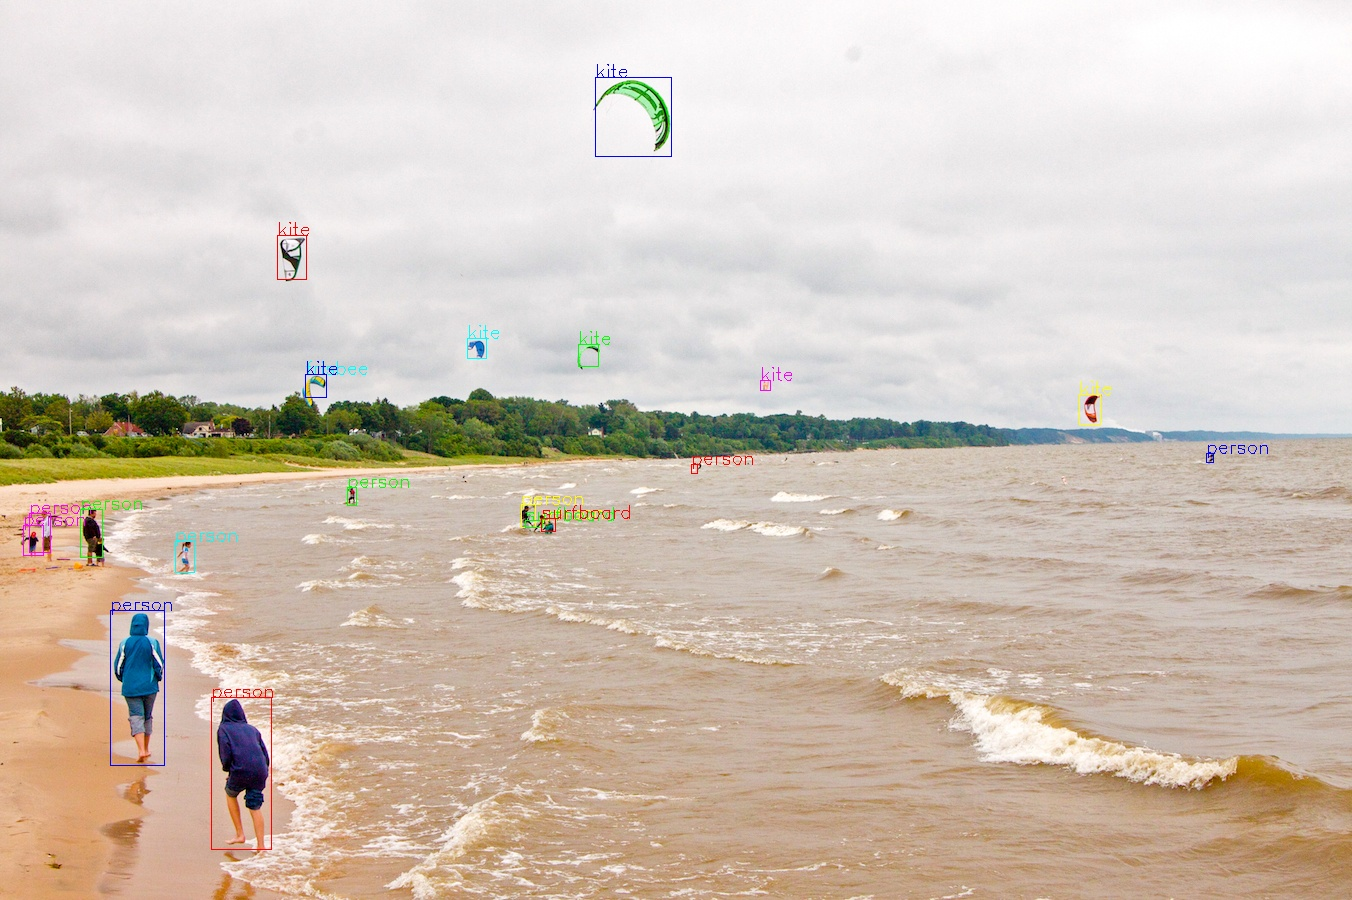

In [6]:
display.Image(f'./out/out_{image_file}')